# Задача 1

![alt text](https://stepik.org/media/attachments/course/50352/task_2_4_graph_02.png)

Рассчитайте производную $y$ по $b2$. Ответ запишите в виде python выражения. Расчитайте значение при некоторых фиксированных значениях x1, x2, b1, b2, c1, c2.

$\frac{\partial y}{\partial b2} = [\frac{\partial y}{\partial z8} \cdot \frac{\partial z8}{\partial z7} \cdot \frac{\partial z7}{\partial z4} \cdot \frac{\partial z4}{\partial z2} +\frac{\partial y}{\partial z9} \cdot \frac{\partial z9}{\partial z6} \cdot \frac{\partial z6}{\partial z5}\cdot \frac{\partial z5}{\partial z2}]\cdot \frac{\partial z2}{\partial b2}$

$c1 \cdot (x1 + b1) \cdot sigma(x2 + b2) \cdot (1-sigma(x2 + b2))+ c2 \cdot (-tanh(x2+b2)\cdot tanh(x2+b2)+1)\cdot sigma(x1+b1)$

In [ ]:
import numpy as np


def sigma(x):
  # f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))
x1,x2 = 0,1
c1,c2 = 1,0
b1,b2 = 1,0

dif_y_b2 = c1 * (x1 + b1) * sigma(x2 + b2) * (1 - sigma(x2 + b2)) + c2 \
*(-np.tanh(x2+b2) * np.tanh(x2 + b2)+1) * sigma(x1+b1)
print(dif_y_b2)


0.19661193324148185


# Задача 2
Проверьте себя: запишите это же выражение при помощи pytorch, расчитайте его значение при тех же значениях x1, x2, b1, b2, c1, c2. Задем возьмите backward, и посмотрите значение b2.grad. Убедитесь, что значения совпадают.

$y = c1 \cdot (x1 + b1) \cdot sigma(x2 + b2) + c2 \cdot tanh(x2+b2) \cdot sigma(x1+b1)$

In [ ]:
import torch
import torch.nn as nn
x1 = torch.tensor(0.)
x2 = torch.tensor(1.)
c1 = torch.tensor(1.)
c2 = torch.tensor(0.)
b1 = torch.tensor(1.)
b2 = torch.tensor(0., requires_grad=True)

torch_sigma = nn.Sigmoid()
torch_tanh = nn.Tanh()


y = (x1+b1) * torch_sigma(x2+b2) * c1 \
                  +torch_tanh(x2+b2) * c2 * torch_sigma(x1+b1)

y.backward()
print(b2.grad)
print(b2.grad==dif_y_b2)

tensor(0.1966)
tensor(True)


# Задача 3
Иногда даже в PyTorch приходится вручную писать производные некоторых операций. Это иногда нужно, чтобы сэкономить вычисления или память. Мы потренируемся на простом примере: полносвязном слое. Запишите средствами pytorch, что происходит в линейном слое (одно выражение): $\mathbf{y} = \mathbf{A} \mathbf{x} + \mathbf{b}$ ($\mathbf{A}$ -- матрица 2x3, $\mathbf{y}, \mathbf{x}, \mathbf{b}$ -- векторы размеров 2, 3 и 2 cоответственно). Инициализируйте A, x и b некоторыми значениями, вектор y на выходе сравнивайте с некоторым выбранным вами вектором при помощи некоторой функции потерь (используйте, MSE). Помните, что функция потерь должна возвращать одно число.

Расчитайте при помощи метода backward производную лосс функции по параметрам $\mathbf{A}$, $\mathbf{x}$ и $\mathbf{b}$.



In [ ]:
import torch

#рассчитаем "правильные" значения для сравнения
A_true = torch.tensor([[3.0,2.0,6.0],
                       [1.0,2.0,5.0]])
x_true = torch.tensor([[3.0],
                       [2.0],
                       [2.0]])
b_true = torch.tensor([[7.0],
                        [8.0]])
y_true = torch.mm(A_true,x_true)+b_true
print(y_true)
#далее инициализируем сравниваемый y_pred
A_pred = torch.tensor([[2.0,5.0,17.0],
                       [3.0,6.0,18.0]],requires_grad=True)
x_pred = torch.tensor([[0.0],
                       [3.0],
                       [0.0]],requires_grad=True)
b_pred = torch.tensor([[7.0],
                       [8.0]],requires_grad=True)
y_pred = torch.mm(A_pred,x_pred)+b_pred
print(y_pred)
loss = ((y_pred - y_true)**2).mean()
loss.backward()
print("Значение MSE:",loss)
print(A_pred.grad)
print(x_pred.grad)
print(b_pred.grad)


tensor([[32.],
        [25.]])
tensor([[22.],
        [26.]], grad_fn=<AddBackward0>)
Значение MSE: tensor(50.5000, grad_fn=<MeanBackward0>)
tensor([[ -0., -30.,  -0.],
        [  0.,   3.,   0.]])
tensor([[ -17.],
        [ -44.],
        [-152.]])
tensor([[-10.],
        [  1.]])


# Задача 4
Запишите выражения для производных лосс-функции по $\mathbf{A}$, $\mathbf{x}$ и $\mathbf{b}$ при помощи numpy (или pytorch, если удобнее). Проверьте, что аналитический результат численно совпадает с тем, что расчиталось при помощи метода backward.

### Для решения задачи 
пользуйтесь тем фактом, что $y_i = \sum_j a_{ij} x_j + b_i$

In [ ]:
import numpy as np

A_pred_np = A_pred.detach().numpy()
x_pred_np = x_pred.detach().numpy()
b_pred_np = b_pred.detach().numpy()
y_pred_np = y_pred.detach().numpy()

y_true_np = y_true.detach().numpy()
np_loss = ((y_pred_np - y_true_np)**2).mean()
#dL/dz
dL_dz = y_pred_np - y_true_np
#dL/db
dL_db = dL_dz
#dL/dA
dL_dA = dL_dz@x_pred_np.T
#dL/dx
dL_dx = A_pred_np.T@dL_dz

print("Значение MSE:",np_loss,np_loss==loss)
print(dL_db,dL_db == b_pred.grad.detach().numpy(),sep='\n')
print(dL_dA,dL_dA == A_pred.grad.detach().numpy(),sep='\n')
print(dL_dx,dL_dx == x_pred.grad.detach().numpy(),sep='\n')

Значение MSE: 50.5 tensor(True)
[[-10.]
 [  1.]]
[[ True]
 [ True]]
[[  0. -30.   0.]
 [  0.   3.   0.]]
[[ True  True  True]
 [ True  True  True]]
[[ -17.]
 [ -44.]
 [-152.]]
[[ True]
 [ True]
 [ True]]


# Задача 5

Решите задачу, в которой происходит восстановление синусоиды при помощи сети, в которой все функции активации заменены на ReLU, также замените оптимизатор с Adam на SGD и подберите оптимальный Learning Rate. Каким получается приближение функции?

In [ ]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

In [ ]:
#генерируем данные синусоида+шум
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0
y_train = torch.sin(x_train)
noise = torch.randn(y_train.shape) / 5.
y_train = y_train + noise

In [ ]:
#меняем форму тензора
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

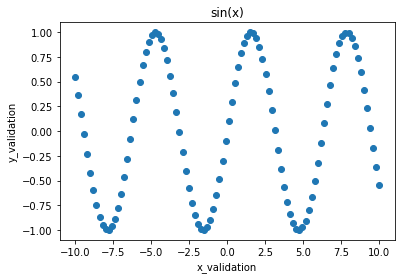

In [ ]:
#генерируем валидационную выборку без шума
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');


In [ ]:
#также изменим форму валидационной выборки
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

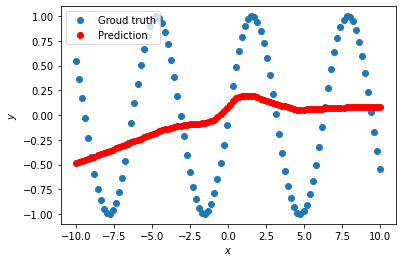

In [ ]:

class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons,init_weights=True):
        super(SineNet, self).__init__()
        
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act3 = torch.nn.ReLU()
        self.fc4 = torch.nn.Linear(n_hidden_neurons, 1)

        if init_weights:
            self._initialize_weights()

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)

        return x

    def _initialize_weights(self,n_hidden_neurons=400):
      for m in self.modules():
        if isinstance(m, nn.ReLU):
            w = torch.empty(n_hidden_neurons, n_hidden_neurons)
            nn.init.kaiming_normal_(w, mode='fan_out', nonlinearity='relu')

#лосс функция
loss = nn.MSELoss()
# использовать будем 400 нейронов
sine_net = SineNet(400)
#функция построения графика
def predict(net, x, y):
    y_pred = net.forward(x)
    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
#в качестве оптимизатора используем SGD и lr=3e-4
optimizer = torch.optim.SGD(sine_net.parameters(), lr=3e-4)
for epoch_index in range(1000):
    optimizer.zero_grad()
    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)
    loss_val.backward()
    optimizer.step()
    if epoch_index % 100 == 0:
            test_preds = sine_net.forward(x_validation)
            
            test_preds = test_preds.argmax(dim=1)
              
predict(sine_net, x_validation, y_validation)


Далее подбираем скорость обучения с помощью torch.optim.lr_scheduler -StepLR

In [ ]:
# использовать будем также 400 нейронов
sine_net = SineNet(400)

In [ ]:
# lr=3e-6 будет начальное значение
optimizer = torch.optim.SGD(sine_net.parameters(), lr=3e-6)

In [ ]:
from torch.optim.lr_scheduler import StepLR
# далее будем увеличивать шаг в 10 раз
scheduler = StepLR(optimizer, step_size=30, gamma=10)

In [ ]:
from sklearn.metrics import mean_squared_error
for epoch_index in range(10000):
    optimizer.zero_grad()
    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)
    loss_val.backward()
    optimizer.step()
    if epoch_index % 100 == 0:
            
            val_preds = sine_net.forward(x_validation)
            train_MSE = mean_squared_error(y_train.detach().numpy(),\
                                           y_pred.detach().numpy())
            valid_MSE = mean_squared_error(y_validation.detach().numpy(),\
                                           val_preds.detach().numpy())
            print('Epoch:', epoch_index,'LR:', scheduler.get_lr(),\
                  'train_MSE:',train_MSE,'valid_MSE:',valid_MSE)
            
            scheduler.step()

Epoch: 0 LR: [3e-06] train_MSE: 0.73852897 valid_MSE: 0.6596421
Epoch: 100 LR: [3e-06] train_MSE: 0.70210016 valid_MSE: 0.63157344
Epoch: 200 LR: [3e-06] train_MSE: 0.6703766 valid_MSE: 0.607518
Epoch: 300 LR: [3e-06] train_MSE: 0.6428387 valid_MSE: 0.5869761
Epoch: 400 LR: [3e-06] train_MSE: 0.61875534 valid_MSE: 0.569331
Epoch: 500 LR: [3e-06] train_MSE: 0.59764695 valid_MSE: 0.5541571
Epoch: 600 LR: [3e-06] train_MSE: 0.57899654 valid_MSE: 0.5410158
Epoch: 700 LR: [3e-06] train_MSE: 0.5624377 valid_MSE: 0.5295914
Epoch: 800 LR: [3e-06] train_MSE: 0.5476927 valid_MSE: 0.5196413
Epoch: 900 LR: [3e-06] train_MSE: 0.5345826 valid_MSE: 0.511003
Epoch: 1000 LR: [3e-06] train_MSE: 0.5228699 valid_MSE: 0.50347966
Epoch: 1100 LR: [3e-06] train_MSE: 0.5123675 valid_MSE: 0.49691457
Epoch: 1200 LR: [3e-06] train_MSE: 0.5030193 valid_MSE: 0.49124214
Epoch: 1300 LR: [3e-06] train_MSE: 0.49469557 valid_MSE: 0.48634845
Epoch: 1400 LR: [3e-06] train_MSE: 0.48727676 valid_MSE: 0.4821297
Epoch: 1500 L

Было заметно уменьшение ошибки при шаге 0,003. Посмотрим на конечный результат при данном шаге

In [ ]:
sine_net = SineNet(400)

In [ ]:
optimizer = torch.optim.SGD(sine_net.parameters(), lr=3e-3)

In [ ]:
# увеличим количество шагов до 20 000
for epoch_index in range(20000):
    optimizer.zero_grad()
    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)
    loss_val.backward()
    optimizer.step()
    if epoch_index % 1000 == 0:
            
            val_preds = sine_net.forward(x_validation)
            train_MSE = mean_squared_error(y_train.detach().numpy(),\
                                           y_pred.detach().numpy())
            valid_MSE = mean_squared_error(y_validation.detach().numpy(),\
                                           val_preds.detach().numpy())
            print('Epoch:', epoch_index,'LR:',\
                  'train_MSE:',train_MSE,'valid_MSE:',valid_MSE)

Epoch: 0 LR: train_MSE: 0.45800886 valid_MSE: 0.4884396
Epoch: 1000 LR: train_MSE: 0.28524697 valid_MSE: 0.2996739
Epoch: 2000 LR: train_MSE: 0.19610673 valid_MSE: 0.2023878
Epoch: 3000 LR: train_MSE: 0.17587094 valid_MSE: 0.16721351
Epoch: 4000 LR: train_MSE: 0.14819959 valid_MSE: 0.13810417
Epoch: 5000 LR: train_MSE: 0.12650795 valid_MSE: 0.10803422
Epoch: 6000 LR: train_MSE: 0.10034493 valid_MSE: 0.08057874
Epoch: 7000 LR: train_MSE: 0.081663325 valid_MSE: 0.06048802
Epoch: 8000 LR: train_MSE: 0.08066456 valid_MSE: 0.055354748
Epoch: 9000 LR: train_MSE: 0.05489237 valid_MSE: 0.036048926
Epoch: 10000 LR: train_MSE: 0.05113057 valid_MSE: 0.03293043
Epoch: 11000 LR: train_MSE: 0.053801574 valid_MSE: 0.034399223
Epoch: 12000 LR: train_MSE: 0.04025126 valid_MSE: 0.023159172
Epoch: 13000 LR: train_MSE: 0.049241632 valid_MSE: 0.030407652
Epoch: 14000 LR: train_MSE: 0.035216294 valid_MSE: 0.019170005
Epoch: 15000 LR: train_MSE: 0.038719315 valid_MSE: 0.021660708
Epoch: 16000 LR: train_MSE: 

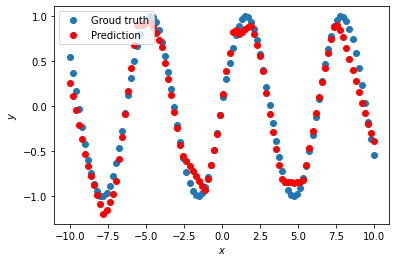

In [ ]:
# посмотрим на конечный результат
predict(sine_net, x_validation, y_validation)

# Задача 6

По примеру задачи Wine решите задачу Titanic (классификация на 2 класса: выжил-не выжил). Добейтесь максимального качества используя сигмоидную функцию активации (соответственно, один выход из нейронной сети) и SoftMax (два выхода из нейронной сети).

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import torch
#фиксируем последовательности библиотек random
random.seed(0)
np.random.seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True


In [ ]:
# загружаем данные
df = pd.read_csv("http://bit.ly/kaggletrain",index_col='PassengerId')

In [3]:
# смотрим пропуски
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# признак Embarked заполним модой
df.Embarked.fillna(df.Embarked.mode()[0], inplace = True)

In [ ]:
# признак Age заполним медианой
df.Age.fillna(df.Age.median(), inplace = True)

In [ ]:
df.drop(['Pclass', 'Fare','Cabin', 'Name', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace=True)

In [ ]:
# признак Sex кодируем LabelEncoder
df['Sex'] = preprocessing.LabelEncoder().fit_transform(df['Sex'])
# остальные категориальные признаки кодируем OHE
new_data = pd.get_dummies(df, columns=['Embarked'])

In [ ]:
# разбиваем данные
X = new_data.drop(['Survived'], axis=1)
y = new_data['Survived']

In [ ]:
# делаем сброс индексов
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [ ]:
scaler = StandardScaler()
age_scaler = scaler.fit_transform(X['Age'].values.reshape(-1, 1))
X['Age'] = age_scaler

In [ ]:
# переводим формат
X = torch.tensor(X.values.astype(np.float32))
y = torch.LongTensor(y.values)

Далее данные разбивать будем на 3 части:
1. 60% - train
2. 20% - valid
3. 20% - test



In [ ]:
X_train, X_test_valid, y_train, y_test_valid = train_test_split(
    X, 
    y, 
    test_size=0.4, 
    shuffle=True)

In [ ]:
X_test, X_valid, y_test, y_valid = train_test_split(
    X_test_valid, 
    y_test_valid, 
    test_size=0.5, 
    shuffle=True)

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

SOftMax

In [ ]:
class TitanicNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(TitanicNet, self).__init__()
        
        self.fc1 = torch.nn.Linear(5, n_hidden_neurons)
        self.activ1 = torch.nn.Sigmoid()
        #после каждой функции активации добавим BatchNorm
        self.bn1 = torch.nn.BatchNorm1d(n_hidden_neurons)
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ2 = torch.nn.Sigmoid()
        self.bn2 = torch.nn.BatchNorm1d(n_hidden_neurons)
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 2)
        
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.bn1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.bn2(x)
        x = self.fc3(x)
        
        return x

        
Titane_net = TitanicNet(5).to(device)

In [ ]:
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(Titane_net.parameters(), 
                             lr=3e-4)

In [ ]:
batch_size = 16

for epoch in range(1000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = Titane_net.forward(x_batch)
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    if epoch % 100 == 0:
        valid_preds = Titane_net.forward(X_valid.to(device))
        valid_preds = valid_preds.argmax(dim=1)
        print((valid_preds == y_valid.to(device)).float().mean())

tensor(0.7542, device='cuda:0')
tensor(0.7542, device='cuda:0')
tensor(0.7542, device='cuda:0')
tensor(0.7542, device='cuda:0')
tensor(0.7542, device='cuda:0')
tensor(0.7542, device='cuda:0')
tensor(0.7542, device='cuda:0')
tensor(0.7598, device='cuda:0')
tensor(0.7598, device='cuda:0')
tensor(0.7598, device='cuda:0')


In [ ]:
#попробуем подобрать скорость обучения
Titane_net = TitanicNet(5).to(device)

In [ ]:
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(Titane_net.parameters(), 
                             lr=3e-2)

In [ ]:
from torch.optim.lr_scheduler import StepLR
# далее будем уменьшать шаг в 10 раз
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

In [ ]:
batch_size = 16

for epoch in range(1000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = Titane_net.forward(x_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    if epoch % 10 == 0:
        valid_preds = Titane_net.forward(X_valid.to(device))
        valid_preds = valid_preds.argmax(dim=1)
        train_preds = Titane_net.forward(X_train.to(device))
        train_preds = train_preds.argmax(dim=1)


        valid_acc = (valid_preds == y_valid.to(device)).float().mean()
        train_acc = (train_preds == y_train.to(device)).float().mean()
        print('train:',train_acc,'valid:',valid_acc,'LR:', scheduler.get_lr())
        scheduler.step()

train: tensor(0.7921, device='cuda:0') valid: tensor(0.7542, device='cuda:0') LR: [0.03]
train: tensor(0.7940, device='cuda:0') valid: tensor(0.7542, device='cuda:0') LR: [0.03]
train: tensor(0.7996, device='cuda:0') valid: tensor(0.7765, device='cuda:0') LR: [0.03]
train: tensor(0.8052, device='cuda:0') valid: tensor(0.7765, device='cuda:0') LR: [0.03]
train: tensor(0.7940, device='cuda:0') valid: tensor(0.7598, device='cuda:0') LR: [0.03]
train: tensor(0.8015, device='cuda:0') valid: tensor(0.7765, device='cuda:0') LR: [0.03]
train: tensor(0.8034, device='cuda:0') valid: tensor(0.7765, device='cuda:0') LR: [0.03]
train: tensor(0.8034, device='cuda:0') valid: tensor(0.7765, device='cuda:0') LR: [0.03]
train: tensor(0.8090, device='cuda:0') valid: tensor(0.7765, device='cuda:0') LR: [0.03]
train: tensor(0.8071, device='cuda:0') valid: tensor(0.7654, device='cuda:0') LR: [0.03]
train: tensor(0.8071, device='cuda:0') valid: tensor(0.7765, device='cuda:0') LR: [0.00030000000000000003]
tra

In [ ]:
#зафиксируем lr=3e-3
Titane_net = TitanicNet(5).to(device)
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(Titane_net.parameters(), 
                             lr=3e-3)

In [ ]:
batch_size = 16

for epoch in range(1000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = Titane_net.forward(x_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    if epoch % 100 == 0:
        valid_preds = Titane_net.forward(X_valid.to(device))
        valid_preds = valid_preds.argmax(dim=1)
        train_preds = Titane_net.forward(X_train.to(device))
        train_preds = train_preds.argmax(dim=1)


        valid_acc = (valid_preds == y_valid.to(device)).float().mean()
        train_acc = (train_preds == y_train.to(device)).float().mean()
        print('train:',train_acc,'valid:',valid_acc)

train: tensor(0.7940, device='cuda:0') valid: tensor(0.7709, device='cuda:0')
train: tensor(0.8015, device='cuda:0') valid: tensor(0.7709, device='cuda:0')
train: tensor(0.8015, device='cuda:0') valid: tensor(0.7709, device='cuda:0')
train: tensor(0.8071, device='cuda:0') valid: tensor(0.7654, device='cuda:0')
train: tensor(0.8052, device='cuda:0') valid: tensor(0.7654, device='cuda:0')
train: tensor(0.8052, device='cuda:0') valid: tensor(0.7654, device='cuda:0')
train: tensor(0.7996, device='cuda:0') valid: tensor(0.7654, device='cuda:0')
train: tensor(0.8034, device='cuda:0') valid: tensor(0.7654, device='cuda:0')
train: tensor(0.8071, device='cuda:0') valid: tensor(0.7709, device='cuda:0')
train: tensor(0.8109, device='cuda:0') valid: tensor(0.7654, device='cuda:0')


In [ ]:
#посмотрим результат на тесте
test_preds = Titane_net.forward(X_test.to(device))
test_preds = test_preds.argmax(dim=1)
test_acc = (test_preds == y_test.to(device)).float().mean()
print(test_acc)

tensor(0.7697, device='cuda:0')


Один выход из сети

In [ ]:
class TitanicNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(TitanicNet, self).__init__()
        
        self.fc1 = torch.nn.Linear(5, 1)
        self.sigm = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.sigm(x)
        return x
    
Titane_net = TitanicNet(50).to(device)

In [ ]:
loss = torch.nn.BCELoss()

optimizer = torch.optim.Adam(Titane_net.parameters(), 
                             lr=3e-4)

In [72]:
from sklearn.metrics import roc_auc_score
ras_train = []
ras_valid = []

batch_size = 16

for epoch in range(1000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = Titane_net.forward(x_batch)
        preds = preds.reshape(y_batch.size()[0])
        preds_ras = Titane_net.forward(x_batch)
        
        
        loss_value = loss(preds, y_batch.float())
        loss_value.backward()
        
        optimizer.step()
        
    if epoch % 100 == 0:
        valid_preds = Titane_net.forward(X_valid.to(device))
        valid_preds_ras = Titane_net.forward(X_valid.to(device))
        #valid_preds = torch.round(valid_preds)
        ras_epoch = roc_auc_score(y_valid.cpu().detach().numpy(), valid_preds_ras.cpu().detach().numpy())
        print('roc_auc_score',ras_epoch)
        

roc_auc_score 0.30109395109395104
roc_auc_score 0.8013513513513514
roc_auc_score 0.8001930501930502
roc_auc_score 0.7994208494208495
roc_auc_score 0.8003217503217503
roc_auc_score 0.8012226512226512
roc_auc_score 0.8025096525096526
roc_auc_score 0.8026383526383526
roc_auc_score 0.8026383526383526
roc_auc_score 0.8026383526383526


In [73]:
#посмотрим результат на тесте
test_preds = Titane_net.forward(X_test.to(device))
#valid_preds = torch.round(valid_preds)
ras_test = roc_auc_score(y_test.cpu().detach().numpy(), test_preds.cpu().detach().numpy())
print('roc_auc_score',ras_test)

roc_auc_score 0.7844827586206896


# Задача 7

По примеру задачи MNIST (без сверточных сетей), решите задачу CIFAR100 (классификация на 100 классов). Добейтесь максимального качества.

В данном задании в качетве метрики использовал precision, но никак не смог избавиться от переобучения и добиться высокого значения метрики на тестовой выборке. Пробовал и подбор шага, и размер выборки и разные архитектуры и количество нейронов...

In [ ]:
import torchvision.datasets
import torchvision.transforms as transforms
from sklearn.metrics import precision_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import torch
#фиксируем последовательности библиотек random
random.seed(0)
np.random.seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [3]:
# загрузим данные
train = torchvision.datasets.CIFAR100('./', download=True, train=True)
test = torchvision.datasets.CIFAR100('./', download=True, train=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# выделим лейблы классов и данные
X_train = train.data
y_train = train.targets
X_test = test.data
y_test = test.targets

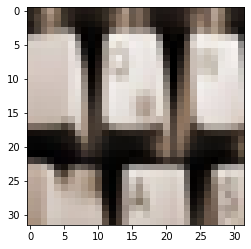

39


In [9]:
# посмотрим каким образом выглядит одна запись
import matplotlib.pyplot as plt
plt.imshow(X_train[15, :, :])
plt.show()
print(y_train[15])

In [ ]:
# изменим форму массивов данных
X_train =  X_train.reshape([-1, 32 * 32 * 3])
X_test =  X_test.reshape([-1, 32 * 32 * 3])

In [ ]:
# посмотрим на баланс классов
class_test = pd.DataFrame(y_test)
class_test.rename(columns={0: 'target'}, inplace=True)
data_test = pd.DataFrame.from_records(X_test)
df_test = pd.concat([data_test,class_test],axis=1)

In [22]:
df_test['target'].value_counts()

95    100
82    100
2     100
10    100
18    100
     ... 
45    100
53    100
61    100
69    100
0     100
Name: target, Length: 100, dtype: int64

In [ ]:
# выполним нормировку данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

In [ ]:
# перевод формата 
X_train = torch.tensor(X_train_scale).float()
y_train = torch.LongTensor(y_train)
X_test = torch.tensor(X_test_scale).float()
y_test = torch.LongTensor(y_test)

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
class CIFAR100Net(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(CIFAR100Net, self).__init__()
        self.fc1 = torch.nn.Linear(32 * 32 * 3, n_hidden_neurons)
        self.ac1 = torch.nn.LeakyReLU()
        #добавим BatchNorm
        self.bn1 = torch.nn.BatchNorm1d(n_hidden_neurons)
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.bn3 = torch.nn.BatchNorm1d(n_hidden_neurons)
        self.ac3 = torch.nn.Sigmoid()
        self.fc4 = torch.nn.Linear(n_hidden_neurons, 100)
        self.sm = torch.nn.LogSoftmax(dim=1) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.bn1(x)
        x = self.fc2(x)
        x = self.bn3(x)
        x = self.ac3(x)
        x = self.fc4(x)
        return x
    
cifar1000_net = CIFAR100Net(100).to(device)

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cifar1000_net.parameters(), lr=1.0e-4)

In [60]:
batch_size = 10000

test_precission_history = []
train_precission_history = []
test_loss_history = []
n_epoch = []
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(2000):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes] .to(device)
        y_batch = y_train[batch_indexes] .to(device)
        
        preds = cifar1000_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
    if epoch % 100 == 0:
      
      n_epoch.append(epoch)
      # в качестве метрики использовал precision с average='macro', 
      #так как классы в выборках сбалансированы
      precision_train = precision_score(y_batch.cpu().detach().numpy(), \
                                        preds.argmax(dim=1).cpu().detach().numpy(), average='macro')
      test_preds = cifar1000_net.forward(X_test)
      test_loss_history.append(loss(test_preds, y_test))

      
      precision_test = precision_score(y_test.cpu().detach().numpy(), \
                                       test_preds.argmax(dim=1).cpu().detach().numpy(), average='macro')
      test_precission_history.append(precision_test)
      train_precission_history.append(precision_train)
      print('precision_train:',precision_train,'precision_test:',precision_test)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision_train: 0.006062782754653407 precision_test: 0.00564481871880898
precision_train: 0.23715111414277634 precision_test: 0.13947298535335972
precision_train: 0.29765461879245586 precision_test: 0.16482317719385445
precision_train: 0.33320795753795573 precision_test: 0.1590837839197865
precision_train: 0.3548202483928481 precision_test: 0.15324336320715323
precision_train: 0.3892439631289177 precision_test: 0.1525016475559639
precision_train: 0.42089561518525714 precision_test: 0.15284923187223576
precision_train: 0.4456492407700754 precision_test: 0.1521960719060517
precision_train: 0.4694982593464731 precision_test: 0.14825793252417524
precision_train: 0.5175881041038771 precision_test: 0.14582090456046673
precision_train: 0.521475902208451 precision_test: 0.14128395780830885
precision_train: 0.5352012221596913 precision_test: 0.14563054696808364
precision_train: 0.5600409911584908 precision_test: 0.14146110335520828
precision_train: 0.5782429542418072 precision_test: 0.14381557

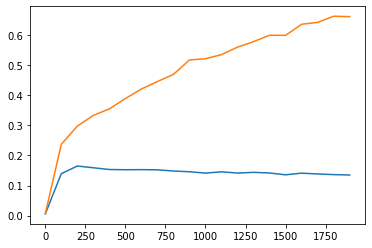

In [62]:
plt.plot(n_epoch,test_precission_history)
plt.plot(n_epoch,train_precission_history);